In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path= "Resources/top5bookies.csv"

In [3]:
data=pd.read_csv(data_path)

In [4]:
data.head()

,ID,League,Date,Time,Matchup_US_P,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,Sibyl,Confidence,Divergence_Y/N,Visi_Team_PTS,Home_Team_PTS,True_Result,Winner_Odd
0,0,ligue-1,2016-08-12,19:30,Guingamp @ Monaco,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Monaco,0.559,N,2,2,Draw,3.70
1,1,premier-league,2016-08-13,15:00,Tottenham @ Everton,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Everton,0.385,Y,1,1,Draw,3.40
2,2,premier-league,2016-08-13,15:00,Swansea City @ Burnley,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Burnley,0.577,N,1,0,Swansea City,2.82
3,3,premier-league,2016-08-13,15:00,West Bromwich @ Crystal Palace,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,Crystal Palace,0.385,N,1,0,West Bromwich,3.91
4,4,premier-league,2016-08-13,15:00,Watford @ Southampton,Watford,Southampton,4.86,3.71,1.79,Southampton,Southampton,0.427,N,1,1,Draw,3.71


In [5]:
data2= data.drop(columns=['Sibyl', 'Confidence', 'Divergence_Y/N', 'Visi_Team_PTS', 'Home_Team_PTS', 'Winner_Odd'])

In [6]:
data2

,ID,League,Date,Time,Matchup_US_P,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,True_Result
0,0,ligue-1,2016-08-12,19:30,Guingamp @ Monaco,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Draw
1,1,premier-league,2016-08-13,15:00,Tottenham @ Everton,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Draw
2,2,premier-league,2016-08-13,15:00,Swansea City @ Burnley,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Swansea City
3,3,premier-league,2016-08-13,15:00,West Bromwich @ Crystal Palace,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,West Bromwich
4,4,premier-league,2016-08-13,15:00,Watford @ Southampton,Watford,Southampton,4.86,3.71,1.79,Southampton,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...
328,328,serie-a,2016-10-16,14:00,Cagliari @ Inter Milan,Cagliari,Inter Milan,9.49,5.14,1.35,Inter Milan,Cagliari
329,329,serie-a,2016-10-16,14:00,Empoli @ Genoa,Empoli,Genoa,4.95,3.50,1.81,Genoa,Draw
330,330,serie-a,2016-10-16,14:00,Crotone @ Sassuolo,Crotone,Sassuolo,6.73,4.15,1.54,Sassuolo,Sassuolo
331,331,serie-a,2016-10-16,19:45,AC Milan @ Chievo,AC Milan,Chievo,2.55,3.07,3.11,AC Milan,AC Milan


In [7]:
data2=data2.loc[:,["Bookies_choice","True_Result"]]

In [8]:
data2

,Bookies_choice,True_Result
0,Monaco,Draw
1,Tottenham,Draw
2,Burnley,Swansea City
3,Crystal Palace,West Bromwich
4,Southampton,Draw
...,...,...
328,Inter Milan,Cagliari
329,Genoa,Draw
330,Sassuolo,Sassuolo
331,AC Milan,AC Milan


In [9]:
bookies_accuracy = np.where(data2["Bookies_choice"] == data2["True_Result"], "Correct", "Incorrect")

In [10]:
data2["Accuracy"]=bookies_accuracy

In [11]:
data2

,Bookies_choice,True_Result,Accuracy
0,Monaco,Draw,Incorrect
1,Tottenham,Draw,Incorrect
2,Burnley,Swansea City,Incorrect
3,Crystal Palace,West Bromwich,Incorrect
4,Southampton,Draw,Incorrect
...,...,...,...
328,Inter Milan,Cagliari,Incorrect
329,Genoa,Draw,Incorrect
330,Sassuolo,Sassuolo,Correct
331,AC Milan,AC Milan,Correct


In [12]:
wrongdata= data2[data2["Accuracy"]=="Incorrect"]
correctdata= data2[data2["Accuracy"]=="Correct"]

In [13]:
wrongdat=wrongdata.count()
correctdat=correctdata.count()

In [14]:
data2["Accuracy"]

0      Incorrect
1      Incorrect
2      Incorrect
3      Incorrect
4      Incorrect
         ...    
328    Incorrect
329    Incorrect
330      Correct
331      Correct
332      Correct
Name: Accuracy, Length: 333, dtype: object

In [24]:
correct=correctdat["Accuracy"]
incorrect=wrongdat["Accuracy"]

In [25]:
accuracy_df= pd.DataFrame([{'Correct':correct, 
                           'Incorrect':incorrect}])



In [26]:
accuracy_df


,Correct,Incorrect
0,181,152


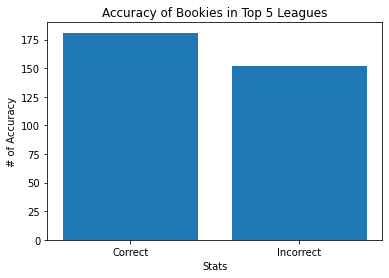

In [38]:
accuracy = ["Correct","Incorrect"]
y_axis= [correct,incorrect]
plt.bar(accuracy,y_axis)
plt.title("Accuracy of Bookies in Top 5 Leagues")
plt.xlabel("Stats")
plt.ylabel("# of Accuracy")
plt.show()